# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("C:\\Users\\rhnil\\Desktop\\Columbia_Bootcamp\\alpaca.env")


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/"
btc_url = btc_url + "?format=json"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"
eth_url = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()

#print(json.dumps(btc_content, indent=4))

btc_price = btc_content["data"]["1"]["quotes"]["USD"]["price"]
print(f"BTC current price: ${btc_price:,.2f}")

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()

#print(json.dumps(eth_content, indent=4))

eth_price = eth_content["data"]["1027"]["quotes"]["USD"]["price"]
print(f"ETH current price: ${eth_price:,.2f}")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

BTC current price: $50,133.00
ETH current price: $2,212.84
The current value of your 1.2 BTC is $60,159.60
The current value of your 5.3 ETH is $11,728.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg =  200
my_spy = 50


In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=35,
).df

# Check for nulls
portfolio_df.isnull().sum()

AGG  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [9]:
# Preview DataFrame
portfolio_df.tail()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.44  4820664  416.26   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.62  3674209  413.91   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.74  5250384  411.51   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.77  3518947  415.88   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                               
                               high     low   close    volume  
time                                                           
2021-04-19 00:00:00-04:00  416.7400  413.79  415.24  66226327  
2021-04-20 00:00:00-04:00  415.0859  410.59  412.22  69715050  
2021-04-21 00:00:00-04:00  416.2900  411.36  416.08  54772634  
2021-04-22 00:00:00-04:00  416.7800  411.13  412.30  90085820  
2021-04-23 00:00:00-04:00  418.2500  412.79  416.72  62186191

In [10]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df['AGG']['close'].iloc[-1]
spy_close_price = portfolio_df['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share; NB: I reveresed to the order of the print statements to be consistent with the code above.
print(f"The current value of your {my_agg} AGG bonds is ${my_agg_value:,.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")


The current value of your 200 AGG bonds is $22,950.00
The current value of your 50 SPY shares is $20,836.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000


# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

# Set the data for the shares value DataFrame

df_savings = pd.DataFrame({'asset':['crypto', 'shares'],
                            'value':[crypto_value, shares_value]})
df_savings = df_savings.set_index('asset')


# Display savings DataFrame
display(df_savings)

,value
asset,
crypto,71887.652
shares,43786.000


<AxesSubplot:ylabel='value'>

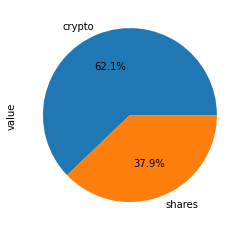

In [13]:
# Plot savings pie chart
df_savings['value'].plot.pie(y="Savings Portfolio Mix",autopct='%1.1f%%')



In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = df_savings['value'].sum()


# Validate saving health
if total_savings > emergency_fund:
    print(f"Your savings of ${total_savings:,.0f} is greater than the recommened emergencey fund amount of 3x monthly income (${emergency_fund:,.0f})")
elif total_savings == emergency_fund:
    print(f"Your savings of ${total_savings:,.0f} is equal to the recommened emergencey fund amount of 3x monthly income $({emergency_fund:,.0f})")
else:
    print(f"Your savings of ${total_savings:,.0f} is less than the recommened emergencey fund amount of 3x monthly income $({emergency_fund:,.0f}). You need additional savings of ${emergency_fund-total_savings:,.0f} to meet the minimum recommend emergency fund amount.")

Your savings of $115,674 is greater than the recommened emergencey fund amount of 3x monthly income ($36,000)


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [16]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Check for nulls
df_stock_data.isnull().sum()

AGG  open      1
     high      1
     low       1
     close     1
     volume    1
SPY  open      1
     high      1
     low       1
     close     1
     volume    1
dtype: int64

In [17]:
df_stock_data = df_stock_data.dropna()

In [18]:
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624.0  238.83   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794.0  239.18   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134.0  239.76   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343.0  239.96   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511.0  239.38   

                                                                 
                               high     low   close      volume  
time                                                             
2017-05-04 00:00:00-04:00  238.9225  237.78  238.75  46170233.0  
2017-05-05 00:00:00-04:00  239.7200  238.68  239.72  43733544.0  
2017-05-08 00:00:00-04:00  239.9200  239.17  239.67  32087919.0  
2017-05-09 00:00:00-04:00  240.1900  239.04  239.46  39723891.0  
2017-05-10 00:00:00-04:00  239.8700  239.15  239.85  34222778.0

In [19]:
# Clean up data frame to include only closing prices for AGG and closing price for SPY

df_stock_data = df_stock_data.drop(columns=[('AGG','open'),('AGG','high'), ('AGG','low'), ('AGG','volume')], axis=1)
df_stock_data = df_stock_data.drop(columns=[('SPY','open'),('SPY','high'), ('SPY','low'), ('SPY','volume')], axis=1)
df_stock_data.head()

,AGG,SPY
,close,close
time,,
2017-05-04 00:00:00-04:00,108.665,238.75
2017-05-05 00:00:00-04:00,108.720,239.72
2017-05-08 00:00:00-04:00,108.495,239.67
2017-05-09 00:00:00-04:00,108.495,239.46
2017-05-10 00:00:00-04:00,108.520,239.85


In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations
num_sims = 100

# Set number of years to simulate
sim_years = 30

# Configure a Monte Carlo simulation to forecast thirty years daily returns; AGG is 60% of portfolio, SPY is 40% of portfolio
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*sim_years
)



In [21]:
# Printing the simulation input data
print(f"Running {num_sims} simulations projecting the performance of your portfolio {tickers} over the next {sim_years} years")

Running 100 simulations projecting the performance of your portfolio ['AGG', 'SPY'] over the next 30 years


In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001381,1.005238,1.000817,0.997481,0.991039,1.006493,0.998565,1.006263,1.006546,1.003927,...,1.002245,0.998179,0.999181,0.998230,1.014485,1.004397,1.011935,0.995522,0.999230,1.005433
2,0.990121,0.996867,1.009494,0.987414,0.981000,1.020269,0.997808,1.019055,1.005295,1.004543,...,1.011781,1.004919,1.003885,0.995419,1.018532,1.000766,1.018336,0.993331,1.015225,1.009879
3,0.983448,0.993192,1.014328,0.994062,0.990296,1.018241,1.019704,1.017090,1.000078,1.002701,...,1.008843,1.013515,1.006675,0.999276,1.027190,0.988684,1.021797,0.995884,1.030266,1.002037
4,0.976274,1.000062,1.013106,0.982355,0.999011,1.013093,1.006847,1.014423,1.011642,0.999053,...,0.998523,1.025144,1.010800,0.999337,1.043100,0.987256,1.018814,0.993024,1.033440,1.012651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.259465,5.741901,52.210500,21.186568,6.747351,18.919091,10.226674,21.551786,23.226151,44.785271,...,34.571535,41.565649,29.051658,26.267363,55.510173,12.177051,31.669832,14.948705,10.919815,17.491216
7557,29.429330,5.776009,51.711848,21.209841,6.713754,18.908258,10.248792,21.388374,22.851353,44.350458,...,34.466811,41.703878,28.980504,26.075701,55.592312,12.176518,31.674630,14.849578,10.826830,17.538709
7558,29.410582,5.817826,52.038933,20.975518,6.662051,18.549913,10.223056,20.952878,22.830239,44.299544,...,34.338384,41.685043,29.278644,25.875154,55.916065,12.225588,31.698565,14.813816,10.903891,17.332590
7559,29.660386,5.826838,52.317924,20.599621,6.729180,18.936629,10.316460,20.758971,22.499591,43.802663,...,34.725184,41.622190,29.740251,25.923040,55.202105,12.131561,31.578083,14.700980,10.902178,17.511591


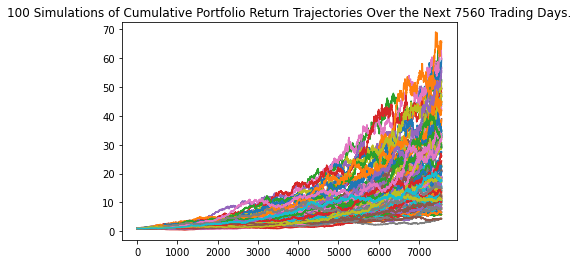

In [23]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()


In [24]:
# Print summary statistics and CI 
tbl = MC_portfolio.summarize_cumulative_return()
print(tbl)

count           100.000000
mean             23.431779
std              15.438979
min               4.280370
25%              10.801054
50%              17.847878
75%              33.414726
max              65.866166
95% CI Lower      5.851573
95% CI Upper     58.076985
Name: 7560, dtype: float64


The 95% confidence interval for 5 year returns on a portfolio of 40/60 ['AGG', 'SPY'] is 5.85x - 58.08x



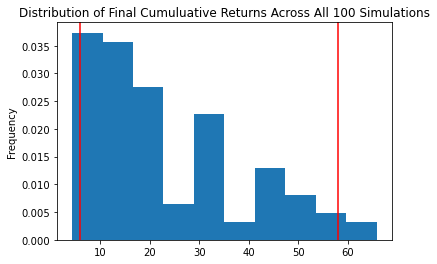

In [25]:
# Calculate probability distribution and confidence intervals
ci_lower = round(tbl[8],2)
ci_upper = round(tbl[9],2)

print(f'The 95% confidence interval for 5 year returns on a portfolio of 40/60 {tickers} is {ci_lower}x - {ci_upper}x\n')
dist_plot = MC_portfolio.plot_distribution()



### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_portfolio_returns = {
    "mean": list(MC_portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio.simulated_return.median(axis=1)),
    "min": list(MC_portfolio.simulated_return.min(axis=1)),
    "max": list(MC_portfolio.simulated_return.max(axis=1))
}

# Create DataFrame with the summary statistics
portfolio_summary_stats = pd.DataFrame(simulated_portfolio_returns)

# Display summary statistics 
portfolio_summary_stats.tail()


,mean,median,min,max
7556,23.455759,17.645654,4.295884,65.437166
7557,23.415628,17.644900,4.356397,65.012670
7558,23.419747,17.592613,4.329755,65.497541
7559,23.424100,17.644887,4.341539,65.328834
7560,23.431779,17.847878,4.280370,65.866166


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio over the next 30 years will end within in the range of ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $117,031.46 and $1,161,539.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $175,547.19 and $1,742,309.54


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set number of simulations
num_sims = 100

# Set number of years to simulate
sim_years = 5

MC_portfolio_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*sim_years
)

# Printing the simulation input data
print(f"Running {num_sims} simulations projecting the performance of your portfolio 40/60 {tickers} over the next {sim_years} years")

Running 100 simulations projecting the performance of your portfolio 40/60 ['AGG', 'SPY'] over the next 5 years


In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988859,1.000267,0.997920,0.994328,0.998659,1.005736,1.006530,1.010558,0.989658,0.994733,...,0.998952,0.994762,1.003335,0.999929,0.991923,1.000654,0.993456,1.015736,1.009932,1.001982
2,0.982562,1.006187,1.001677,1.005640,0.989181,0.997101,1.019793,1.013300,0.986298,1.013490,...,0.998641,0.994337,1.013046,0.997211,0.998955,0.996304,0.985070,1.008688,1.009231,0.996346
3,0.972295,1.007942,1.004673,1.013603,0.994290,1.003694,1.022748,1.001256,0.987818,1.018529,...,0.987217,0.988043,1.021681,0.988398,1.001349,0.992005,0.986473,1.008455,1.011796,0.997951
4,0.972513,0.999731,1.009461,1.013535,1.004751,1.003508,1.032619,0.997343,0.984357,1.018092,...,0.994751,0.991321,1.018430,0.986596,0.986426,1.000307,0.978832,1.012023,1.013702,0.997986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.446587,1.158045,2.447630,1.138408,1.399629,1.499969,2.147322,1.893112,1.686609,2.075120,...,1.138158,2.296670,2.602973,1.447646,1.860080,1.201719,1.056596,1.399641,1.743880,1.448001
1257,1.457990,1.162125,2.413353,1.118622,1.386584,1.493928,2.155976,1.871287,1.696025,2.069457,...,1.145665,2.318015,2.613708,1.467903,1.855199,1.204553,1.059897,1.403359,1.734729,1.437711
1258,1.460789,1.167205,2.414849,1.126991,1.363953,1.506984,2.179896,1.871337,1.705748,2.073549,...,1.147552,2.343019,2.596910,1.470354,1.870354,1.215301,1.050224,1.388839,1.720800,1.437768
1259,1.470393,1.165286,2.385024,1.127191,1.370197,1.519648,2.170963,1.864063,1.702702,2.075517,...,1.156668,2.357678,2.616076,1.481751,1.885516,1.212551,1.050460,1.378874,1.737148,1.445512


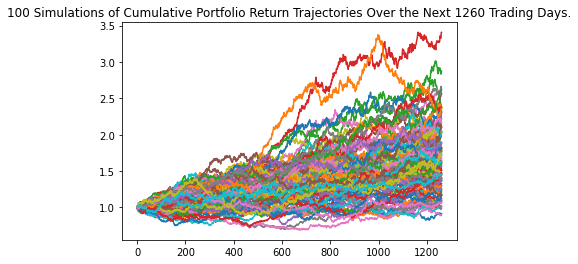

In [31]:
# Plot simulation outcomes
line_plot = MC_portfolio_5yr.plot_simulation()


In [32]:
# Print summary statistics and CI 
tbl = MC_portfolio_5yr.summarize_cumulative_return()
print(tbl)

count           100.000000
mean              1.673073
std               0.482450
min               0.890271
25%               1.302784
50%               1.615739
75%               2.012742
max               3.407647
95% CI Lower      0.999843
95% CI Upper      2.625464
Name: 1260, dtype: float64


The 95% confidence interval for 5 year returns on a portfolio of ['AGG', 'SPY'] is 1.0x - 2.63x



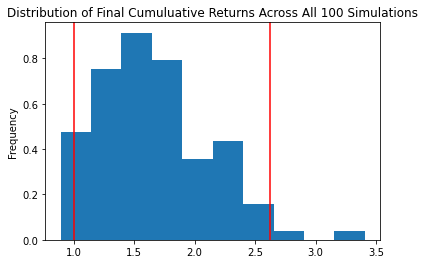

In [33]:
# Calculate probability distribution and confidence intervals
ci_lower = round(tbl[8],2)
ci_upper = round(tbl[9],2)

print(f'The 95% confidence interval for 5 year returns on a portfolio of {tickers} is {ci_lower}x - {ci_upper}x\n')

# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio_5yr.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_portfolio_returns = {
    "mean": list(MC_portfolio_5yr.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio_5yr.simulated_return.median(axis=1)),
    "min": list(MC_portfolio_5yr.simulated_return.min(axis=1)),
    "max": list(MC_portfolio_5yr.simulated_return.max(axis=1))
}

# Create DataFrame with the summary statistics
portfolio_summary_stats = pd.DataFrame(simulated_portfolio_returns)

# Print summary statistics 
print(portfolio_summary_stats)



          mean    median       min       max
0     1.000000  1.000000  1.000000  1.000000
1     1.000449  1.000069  0.978811  1.023600
2     1.001665  1.002244  0.969287  1.025052
3     1.002629  1.001303  0.957781  1.041760
4     1.003026  1.001083  0.954586  1.061644
...        ...       ...       ...       ...
1256  1.666744  1.619565  0.893189  3.326897
1257  1.665023  1.620855  0.888518  3.325966
1258  1.668520  1.624940  0.896090  3.356458
1259  1.671790  1.615127  0.895782  3.405319
1260  1.673073  1.615739  0.890271  3.407647

[1261 rows x 4 columns]


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $59,990.59 and $157,527.87


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Set number of simulations
num_sims = 100

# Set number of years to simulate
sim_years = 10

MC_portfolio_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = num_sims,
    num_trading_days = 252*sim_years
)

# Printing the simulation input data
print(f"Running {num_sims} simulations projecting the performance of your portfolio 40/60 {tickers} over the next {sim_years} years")

Running 100 simulations projecting the performance of your portfolio 40/60 ['AGG', 'SPY'] over the next 10 years


In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004002,0.995490,0.998756,0.994696,0.998921,1.003757,1.006604,0.999191,1.005486,1.000723,...,1.005430,0.993492,0.991325,1.010381,1.002053,1.006150,1.002638,1.005798,1.002946,0.994043
2,0.998672,1.003611,1.000126,0.993731,0.997747,0.992944,1.005770,0.995937,1.009188,1.000196,...,0.998874,0.988443,0.992831,1.000544,1.004255,1.014986,1.003200,1.005594,1.003232,0.979395
3,1.010541,1.005801,0.993334,0.988716,1.002087,0.990971,1.015570,1.000054,1.018017,1.002341,...,0.994542,0.995635,0.998839,0.999348,1.008199,1.019092,0.999596,1.003696,1.003348,0.972157
4,1.015759,1.007569,0.994823,0.992473,0.999252,0.994581,1.024809,1.001183,1.021766,1.006104,...,0.992432,0.991044,0.998784,1.000706,1.016203,1.032092,0.999666,1.011915,1.002886,0.983303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.395863,1.976726,2.748776,1.371628,1.306330,1.571474,1.849919,2.606946,1.435705,1.137190,...,3.010164,2.617741,1.645252,2.650189,1.808407,2.249325,2.720251,2.694708,2.662099,1.768071
2517,2.402315,1.980643,2.738194,1.373899,1.315209,1.581834,1.856293,2.623591,1.439441,1.129703,...,3.008131,2.625052,1.635349,2.642987,1.817279,2.258436,2.731073,2.693121,2.648369,1.762400
2518,2.421413,1.977409,2.743707,1.365871,1.324602,1.582480,1.850273,2.587244,1.445885,1.132134,...,3.025723,2.619405,1.630714,2.639227,1.829917,2.255794,2.717620,2.691015,2.654858,1.764197
2519,2.436429,1.994142,2.742357,1.368503,1.328541,1.591842,1.850768,2.609151,1.440679,1.127416,...,3.014709,2.626331,1.621059,2.653979,1.812399,2.254811,2.715519,2.694167,2.632968,1.765378


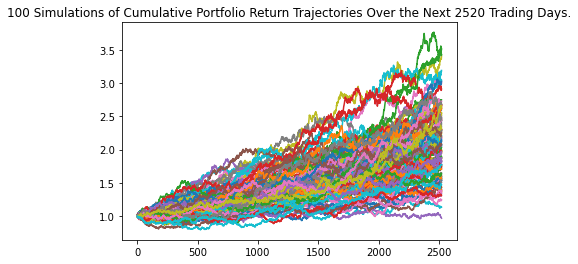

In [39]:
# Plot simulation outcomes
line_plot = MC_portfolio_10yr.plot_simulation()

In [40]:
# Print summary statistics and CI 
tbl = MC_portfolio_10yr.summarize_cumulative_return()
print(tbl)

count           100.000000
mean              2.084090
std               0.533714
min               0.964228
25%               1.688039
50%               2.058036
75%               2.444517
max               3.509022
95% CI Lower      1.275066
95% CI Upper      3.307159
Name: 2520, dtype: float64


The 95% confidence interval for 10 year returns on a portfolio of 40/60 ['AGG', 'SPY'] is 1.28x - 3.31x



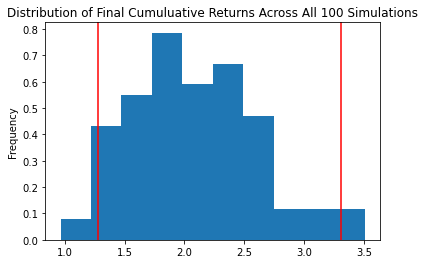

In [41]:
# Calculate probability distribution and confidence intervals
ci_lower = round(tbl[8],2)
ci_upper = round(tbl[9],2)

print(f'The 95% confidence interval for 10 year returns on a portfolio of 40/60 {tickers} is {ci_lower}x - {ci_upper}x\n')

# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio_10yr.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_portfolio_returns = {
    "mean": list(MC_portfolio_10yr.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio_10yr.simulated_return.median(axis=1)),
    "min": list(MC_portfolio_10yr.simulated_return.min(axis=1)),
    "max": list(MC_portfolio_10yr.simulated_return.max(axis=1))
}

# Create DataFrame with the summary statistics
portfolio_summary_stats = pd.DataFrame(simulated_portfolio_returns)

# Print summary statistics 
print(portfolio_summary_stats)


          mean    median       min       max
0     1.000000  1.000000  1.000000  1.000000
1     1.000444  1.000694  0.986672  1.012638
2     0.999890  1.000161  0.979395  1.021084
3     0.999773  0.999683  0.972157  1.019422
4     1.000734  1.000319  0.976402  1.032092
...        ...       ...       ...       ...
2516  2.084927  2.054693  0.981775  3.499983
2517  2.083690  2.054871  0.980544  3.515653
2518  2.083635  2.065070  0.975704  3.514413
2519  2.083617  2.061688  0.971696  3.530803
2520  2.084090  2.058036  0.964228  3.509022

[2521 rows x 4 columns]


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")



There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $76,503.94 and $198,429.55
